# Analysis workbook for oxetane opening reaction

Code for plotting is in `multicat-data/manuscript_figures`.

In [20]:
# running utility functions and base settings
%run '../viz_fns.ipynb'

## Processing simulation data

In this section we visualize a sample landscape, then execute the simulation analysis workflow: we select the top $ (k,t,r) $ parameters for each landscape, perform statistical analysis on the best accuracy/efficiency metrics, etc.

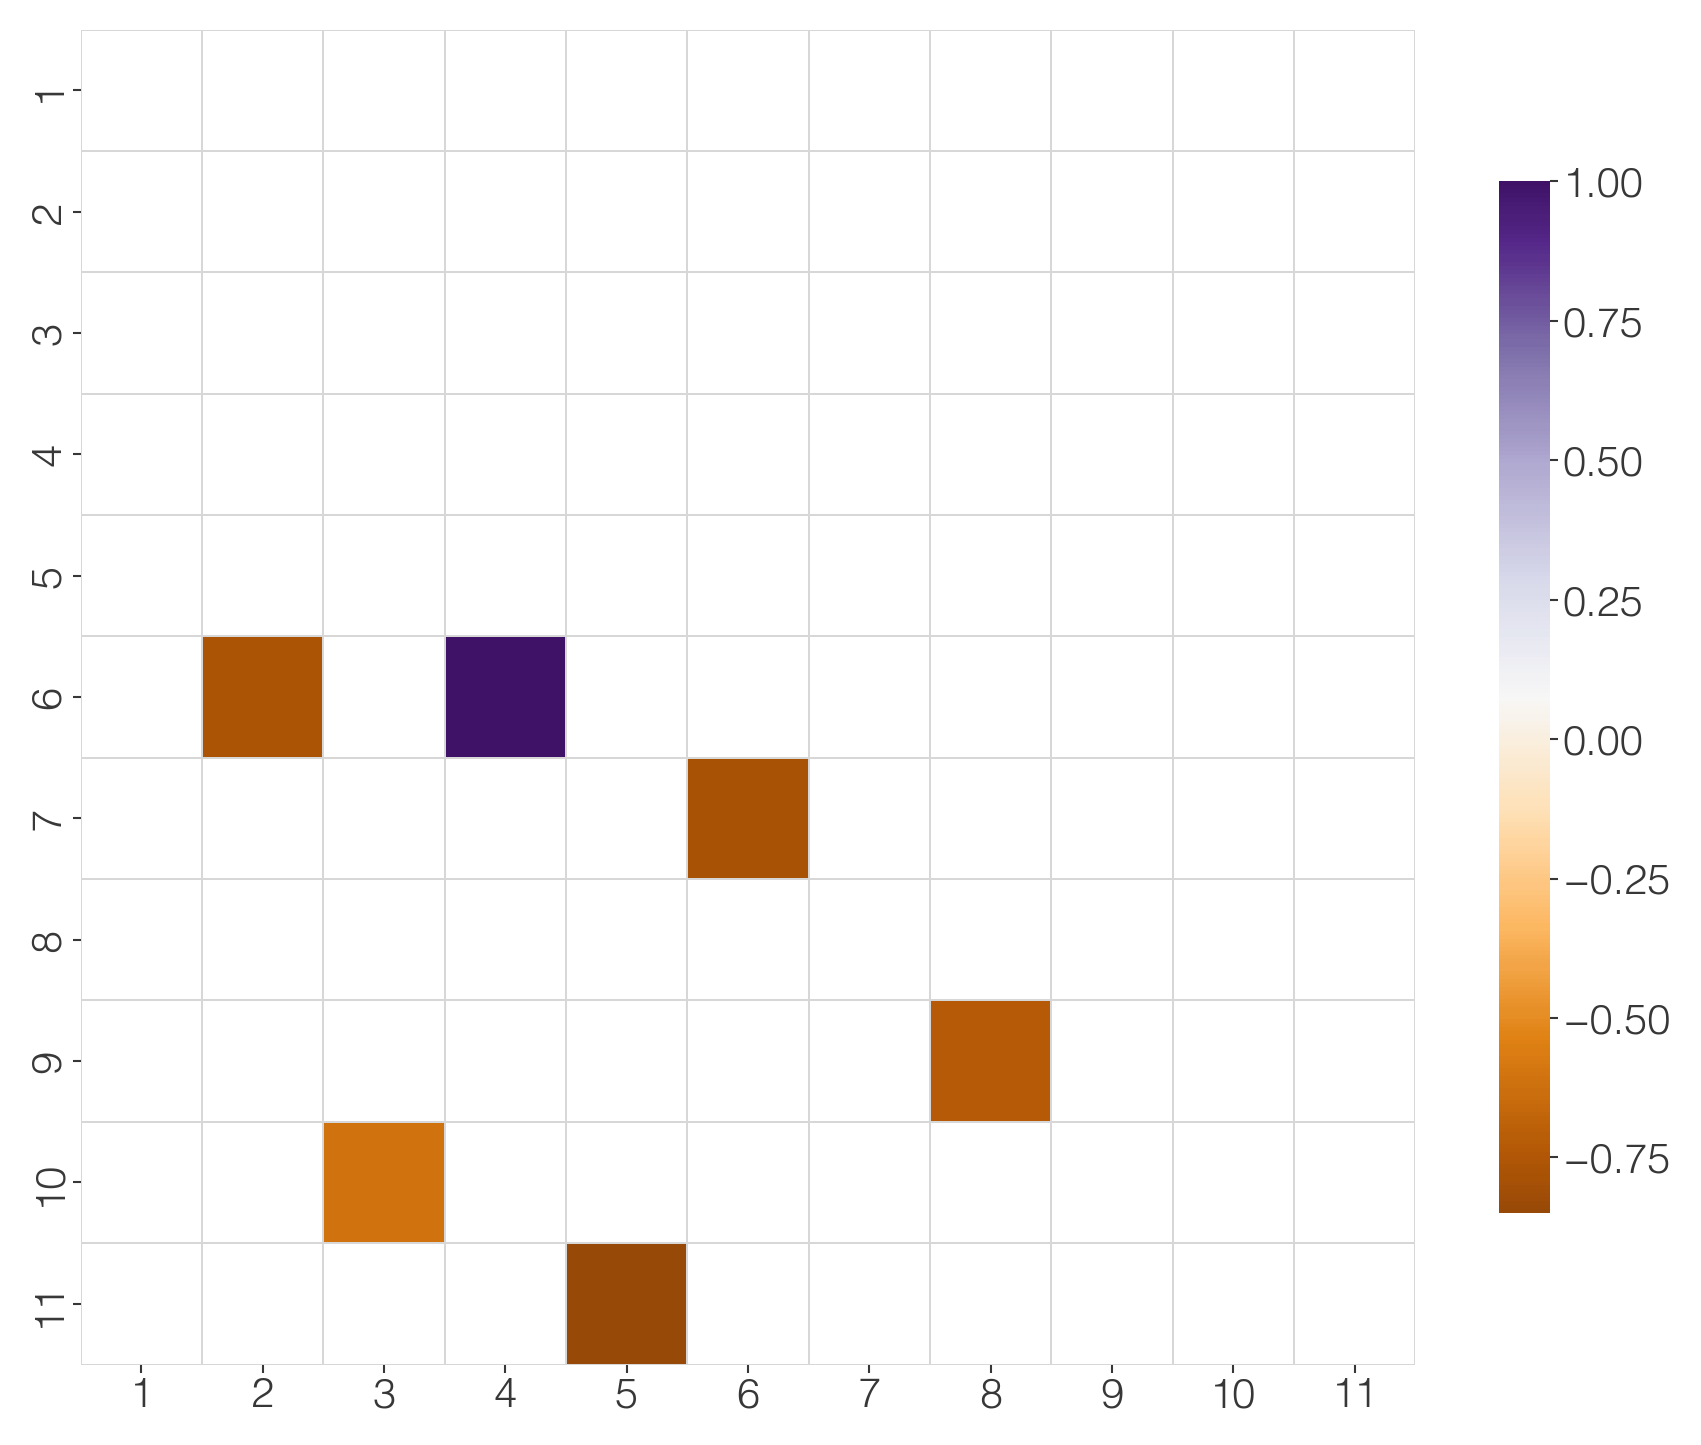

In [22]:
f = './simulation/ls/11_oxet_0_ls_1_coop_mat.csv'

viz_coop_zero_center(11, f, simple=False)

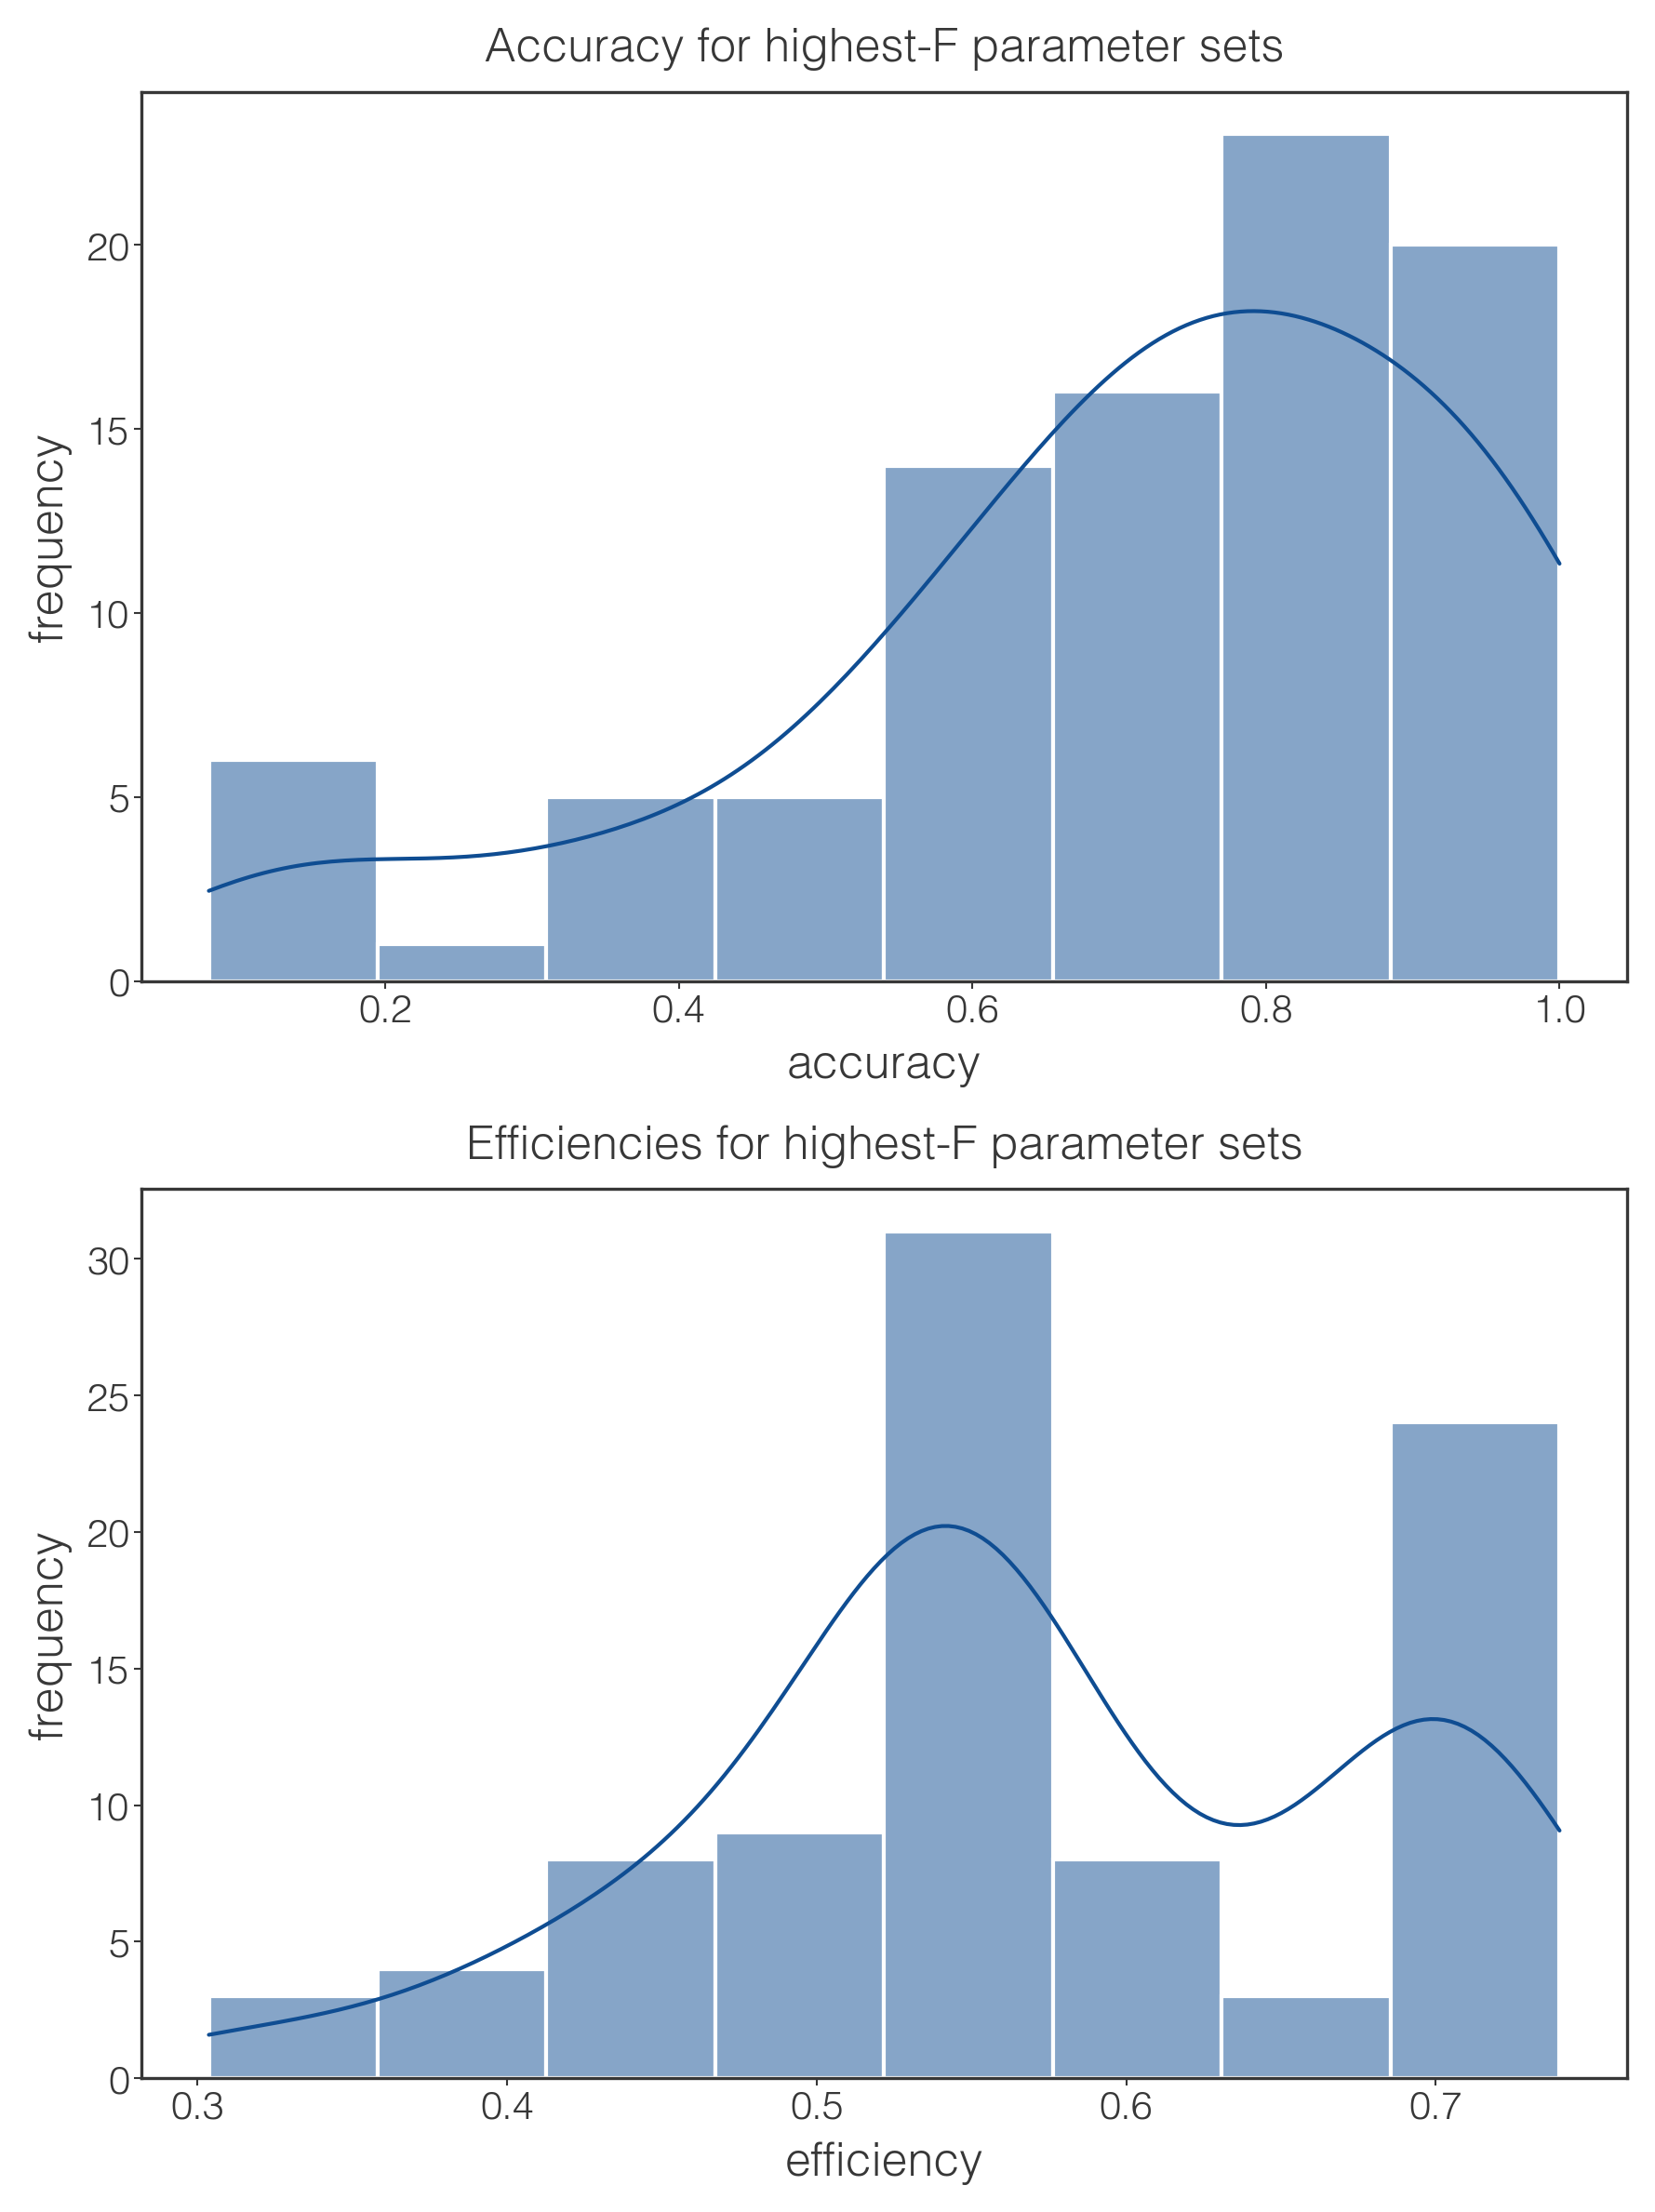

Parameter report saved to ./simulation/top_params.csv


(0.7065555555555556, 0.5695818181818183)

In [21]:
viz_batch_optim('./simulation/out/*out.csv', N=11, beta=1, viz_dist=True, report_params='./simulation/top_params.csv')

## Experimental data

Pooling and deconvolution were performed with the [Multicat website](https://multicat.onrender.com). The relevant CSV "worksheets" with yields filled in are included in `multicat-data/oxetane/experiment`.

In [18]:
def truncate_cmap(cmap='PuOr', lo=0.05, hi=0.95, n=256):
    """Return a truncated copy of a colormap."""
    base = plt.get_cmap(cmap) if isinstance(cmap, str) else cmap
    return mpl.colors.LinearSegmentedColormap.from_list(
        f'trunc({base.name},{lo:.2f},{hi:.2f})',
        base(np.linspace(lo, hi, n))
    )

def viz_Q_heatmap(csv_file):
    """
    Visualize pairwise Q values from a CSV as a heatmap with component labels.
    """
    # Load and parse data
    df = pd.read_csv(csv_file)
    pair_cols = df['pool'].apply(lambda s: [token.strip() for token in s.strip('[]').split(',')])
    components = sorted({item for pair in pair_cols for item in pair})
    N = len(components)
    index = {k: i for i, k in enumerate(components)}

    # Build heatmap matrix
    heatmap = np.full((N, N), np.nan)
    for (comp_i, comp_j), q in zip(pair_cols, df['Q']):
        i, j = index[comp_i], index[comp_j]
        if j > i:
            heatmap[j, i] = q
        else:
            heatmap[i, j] = q

    # Color mapping
    cmap = truncate_cmap('PuOr')
    finite_vals = heatmap[~np.isnan(heatmap)]
    vmin, vmax = finite_vals.min(), finite_vals.max()
    norm = (
        TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
        if vmin < 0 < vmax else
        mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    )

    # Plotting
    mask = np.triu(np.ones_like(heatmap, dtype=bool))
    plt.figure(figsize=(6, 6), dpi=300)
    ax = sns.heatmap(
        heatmap,
        mask=mask,
        cmap=cmap,
        norm=norm,
        square=True,
        linewidths=0.1,
        linecolor='#d7d7d7',
        annot=False,
        cbar=True,
        cbar_kws={'shrink': 0.6}
    )

    # Apply component labels
    ax.set_xticks(np.arange(N) + 0.5)
    ax.set_yticks(np.arange(N) + 0.5)
    ax.set_xticklabels(components, rotation=90)
    ax.set_yticklabels(components, rotation=0)

    ax.set_title('')
    plt.tight_layout()
    plt.show()

# Example usage:
# viz_Q_heatmap_with_labels("oxetane_all_pairs_yield_Q.csv")


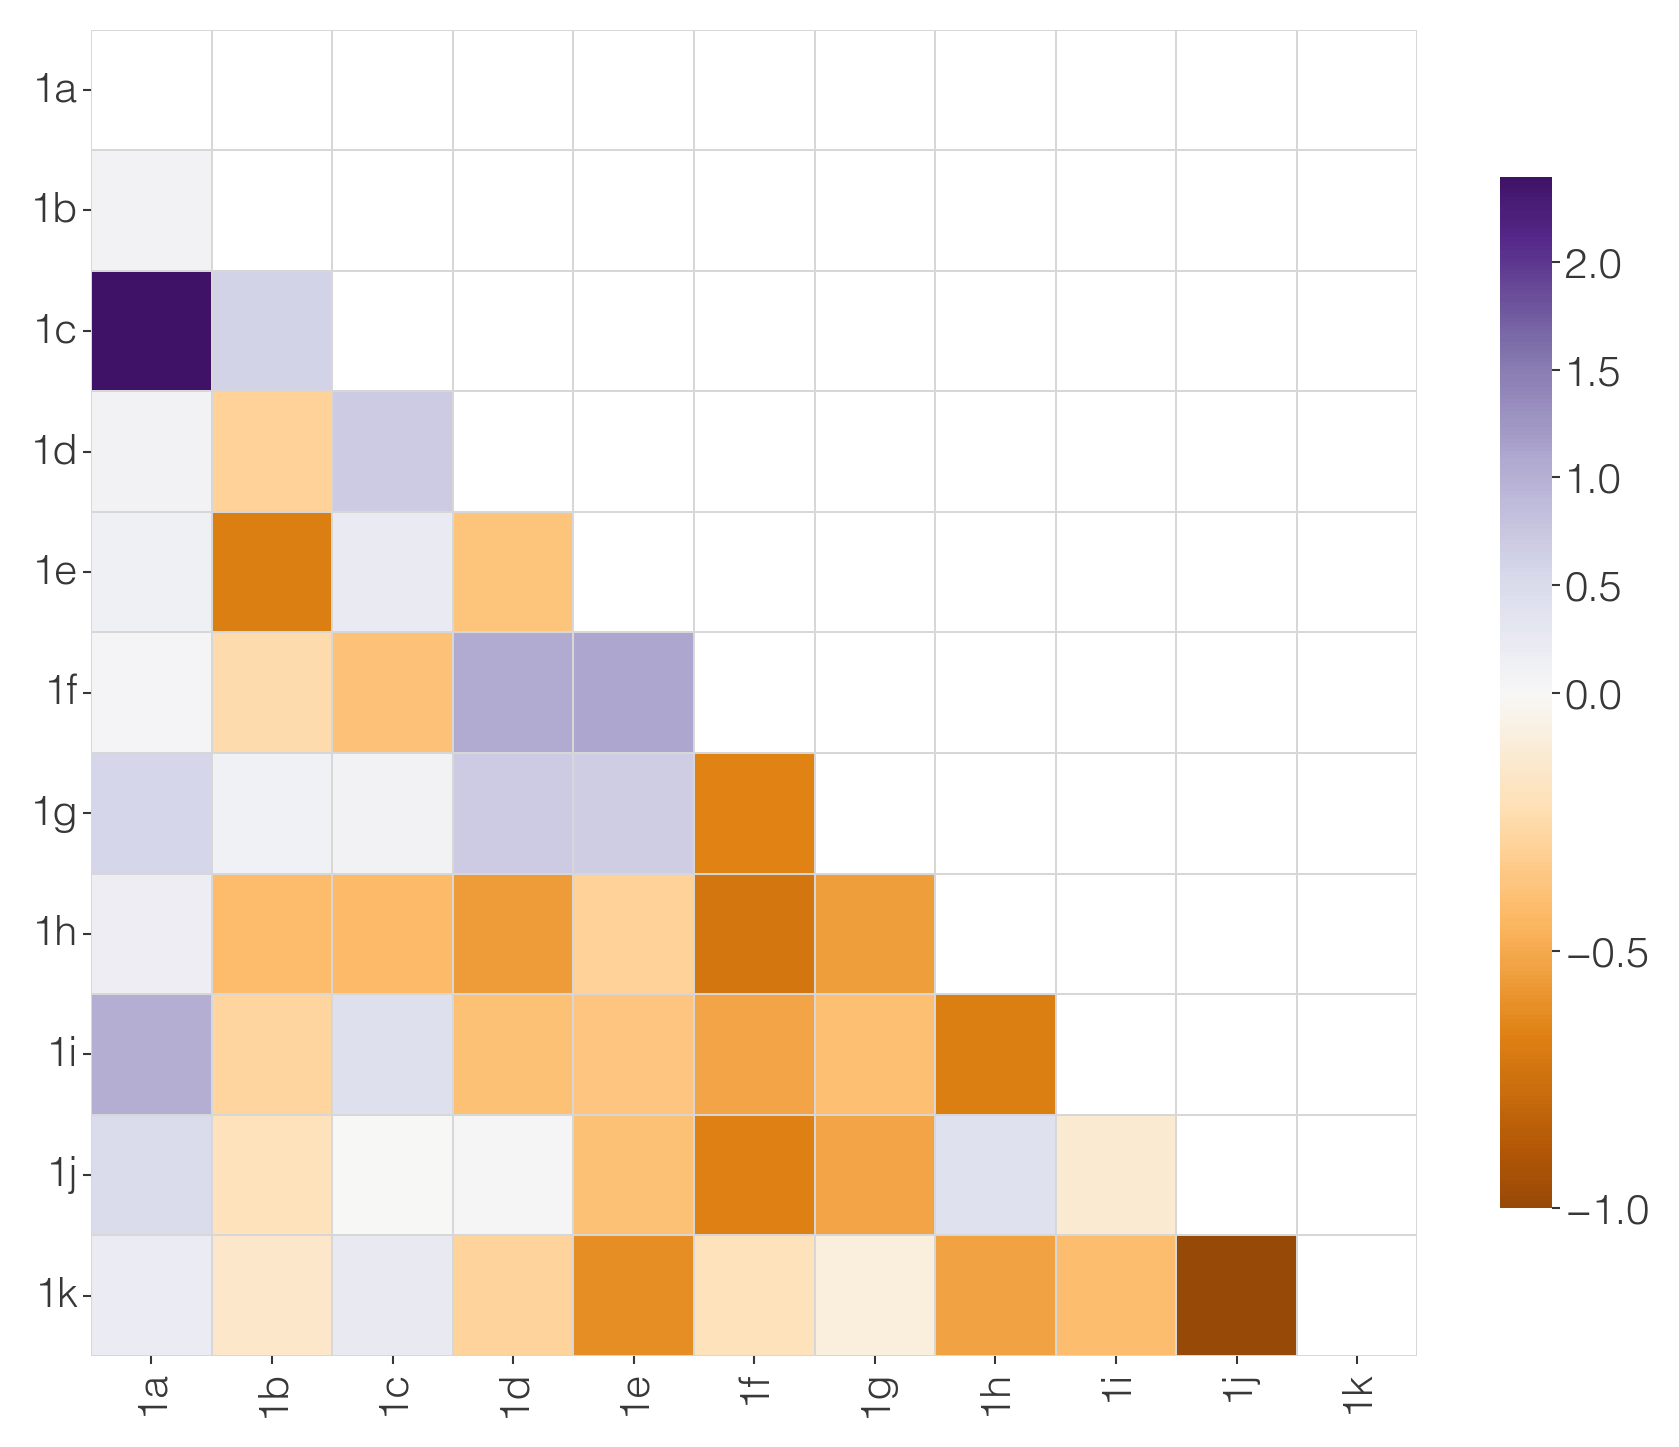

In [19]:
viz_Q_heatmap('./experiment/oxetane_all_pairs_yield_Q.csv')